In [25]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (60000, 28, 28, 1))
test_images  = tf.reshape(test_images, (10000, 28, 28, 1))

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(4, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_data = model.fit(train_images, train_labels, batch_size=1024,
                         validation_data=(test_images, test_labels), epochs=50)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 676)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               86656     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 87,986
Trainable params: 87,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
59/59 [==============================] - 1s 12ms/step - loss: 1.3771 - accuracy: 0.5954 - val_loss: 0.558

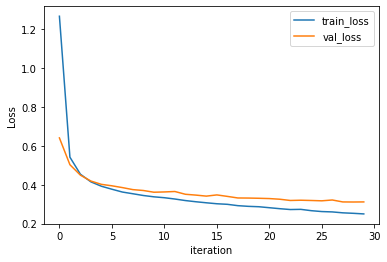

In [3]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.plot(history_data.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

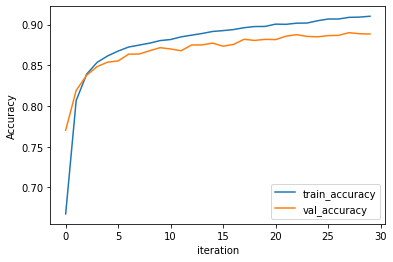

In [4]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.plot(history_data.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [6]:
import tensorflow as tf
from tensorflow import keras


def construct_model():
    inp = keras.layers.Input(shape=[28, 28, 1])
    x = keras.layers.Conv2D(3, (3, 3), activation='relu')(inp)
    x = keras.layers.MaxPooling2D(2)(x)

    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dense(10, activation='softmax')(x)

    return tf.keras.Model(inputs=[inp], outputs=x)




fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (60000, 28, 28, 1))
test_images  = tf.reshape(test_images, (10000, 28, 28, 1))

# model
model = construct_model()
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_data = model.fit(train_images, train_labels, batch_size=1024,
                         validation_data=(test_images, test_labels), epochs=30)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 507)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65024     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 66,344
Trainable params: 66,344
Non-trainable params: 0
_________________________________________________________

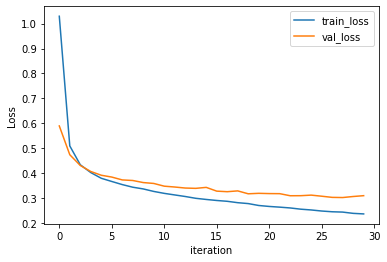

In [7]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.plot(history_data.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

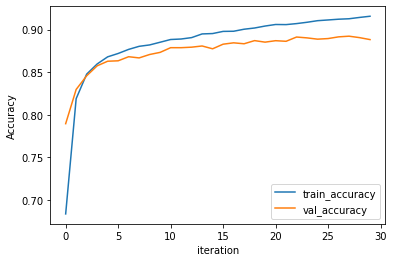

In [8]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.plot(history_data.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [7]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (_, _) = fashion_mnist.load_data()
print(X_train.shape)

X_train = X_train.reshape(-1,28,28,1)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
print(X_train.shape)

X_train_edge = tf.image.sobel_edges(X_train)
print(X_train_edge.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
(60000, 28, 28, 1, 2)


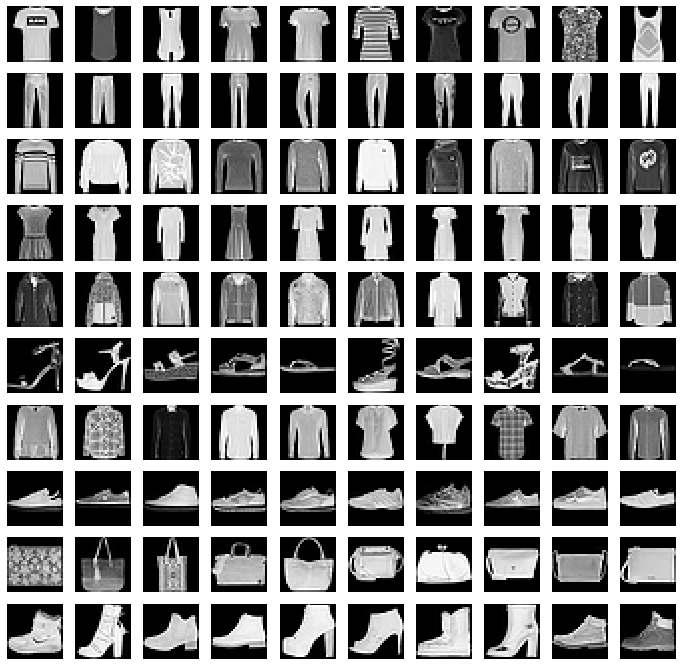

In [11]:
import matplotlib.pyplot as plt 
import numpy as np 

fig =plt.figure(figsize=(12,12))

for i in range(10):
    X_train_i = X_train[y_train==i]
    X_train_i = X_train_i[:10]
    
    for j in range(10):
        img = X_train_i[j].numpy().reshape((28,28))
        
        fig.add_subplot(10, 10, i*10 + j+1)
        plt.axis('off')
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)

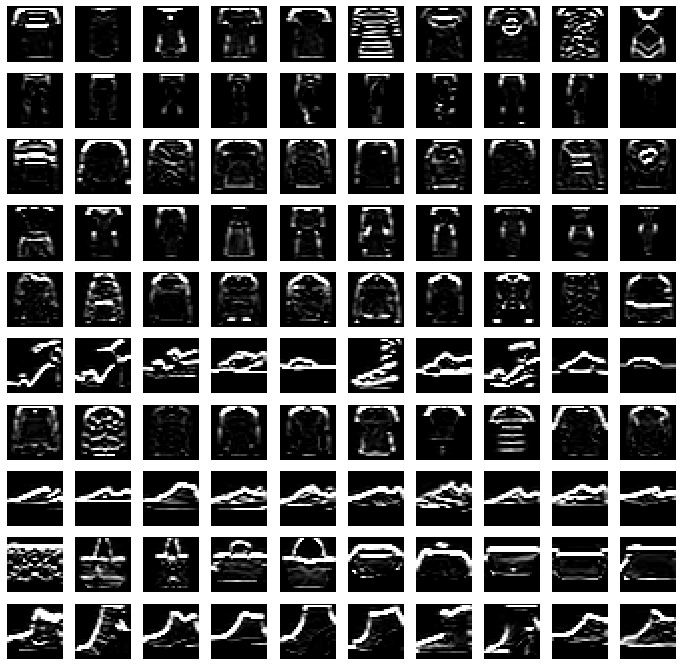

In [13]:
import matplotlib.pyplot as plt 
import numpy as np 

fig =plt.figure(figsize=(12,12))

for i in range(10):
    X_train_i = X_train_edge[y_train==i]
    X_train_i = X_train_i[:10]
    
    for j in range(10):
        img = X_train_i[j].numpy().reshape((28,28,2))
        img = img[:,:,0]
        
        fig.add_subplot(10, 10, i*10 + j+1)
        plt.axis('off')
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)

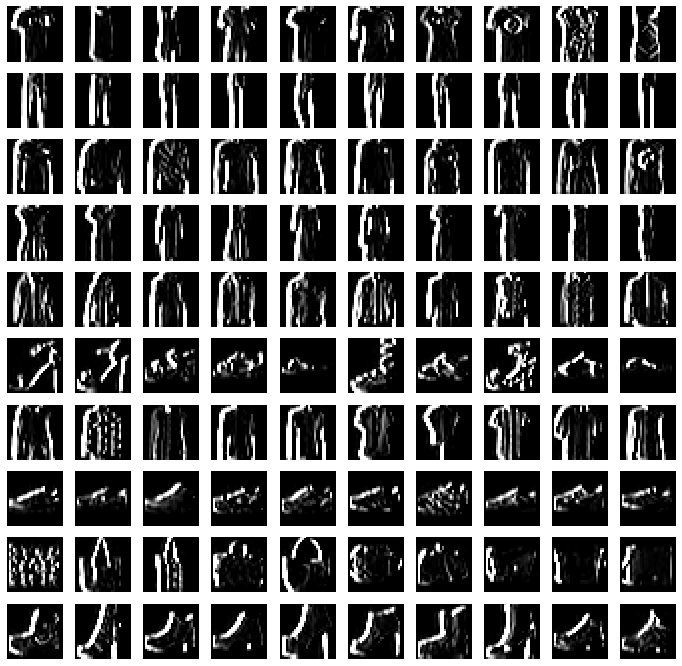

In [20]:
import matplotlib.pyplot as plt 
import numpy as np 

fig =plt.figure(figsize=(12,12))

for i in range(10):
    X_train_i = X_train[y_train==i]
    X_train_i = X_train_i[:10]
    
    for j in range(10):
        img = X_train_i[j].numpy().reshape((28,28,2))
        img = img[:,:,1]
        
        fig.add_subplot(10, 10, i*10 + j+1)
        plt.axis('off')
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [16]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (_, _) = fashion_mnist.load_data()
print(X_train.shape)

X_train = X_train.reshape(-1,28,28,1)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
print(X_train.shape)

X_train_dx, X_train_dy = tf.image.image_gradients(X_train)
print(X_train_dx.shape)
print(X_train_dy.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
(60000, 28, 28, 1)
(60000, 28, 28, 1)


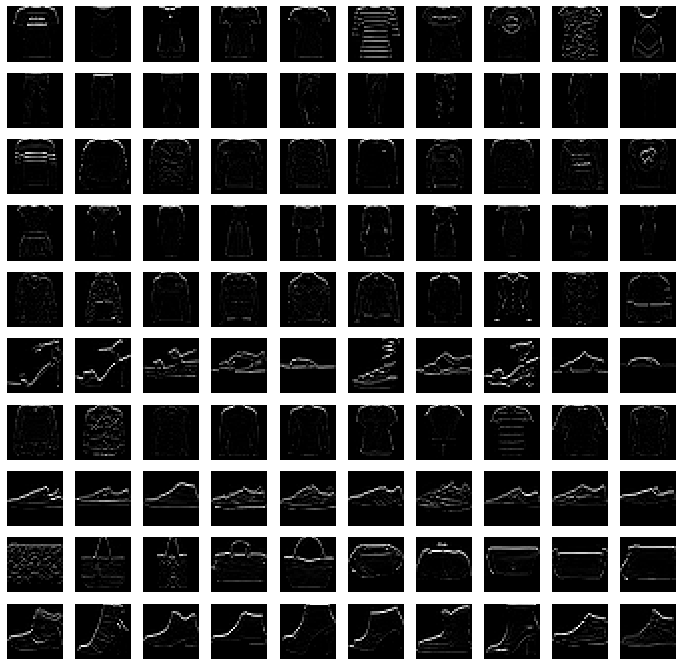

In [25]:
import matplotlib.pyplot as plt 
import numpy as np 

fig =plt.figure(figsize=(12,12))

for i in range(10):
    X_train_i = X_train_dx[y_train==i]
    X_train_i = X_train_i[:10]
    
    for j in range(10):
        img = X_train_i[j].numpy().reshape((28,28))
        
        fig.add_subplot(10, 10, i*10 + j+1)
        plt.axis('off')
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)

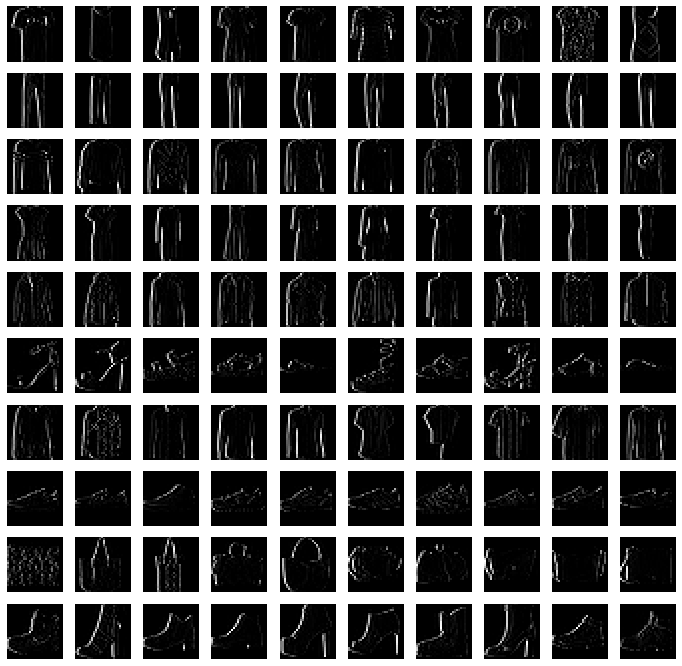

In [26]:
import matplotlib.pyplot as plt 
import numpy as np 

fig =plt.figure(figsize=(12,12))

for i in range(10):
    X_train_i = X_train_dy[y_train==i]
    X_train_i = X_train_i[:10]
    
    for j in range(10):
        img = X_train_i[j].numpy().reshape((28,28))
        
        fig.add_subplot(10, 10, i*10 + j+1)
        plt.axis('off')
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [17]:
import tensorflow as tf
from tensorflow import keras


def construct_model():
    inp = keras.layers.Input(shape=[28, 28, 1])  

    # get edges
    edges = tf.image.sobel_edges(inp)
    edges = tf.keras.layers.Reshape((28,28,2))(edges)

    dx, dy = tf.image.image_gradients(inp)
    x = tf.keras.layers.Concatenate(axis=3)([dx, dy, edges])

    x = keras.layers.MaxPooling2D(2)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dense(10, activation='softmax')(x)

    return tf.keras.Model(inputs=[inp], outputs=x)




fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (60000, 28, 28, 1))
test_images  = tf.reshape(test_images, (10000, 28, 28, 1))

# model
model = construct_model()
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_data = model.fit(train_images, train_labels, batch_size=1024,
                         validation_data=(test_images, test_labels), epochs=1)

ValueError: Duplicate node name in graph: 'stack'

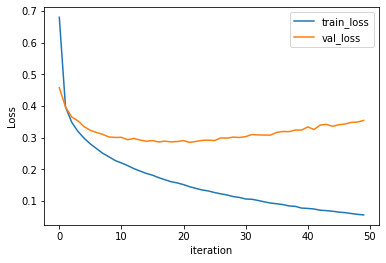

In [23]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.plot(history_data.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

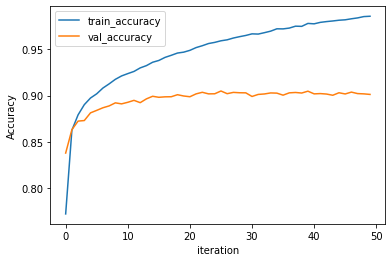

In [24]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.plot(history_data.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()